# Undertanding the IMDB Reviews Data Set

Instructions
* You will need to make a new virtual enviroment so that the libraries we are going to use will work
    * Steps to create a virtual enviroment:
        * Go to the project directory and run this command:
            * python -m venv IMDB_ven
        * Then on MacOS, type this command:
            * source IMDB_ven/bin/activate
        * On Windows, type this command:
            * IMDB_ven\Scripts\activate
        * Now we are in the virtual enviroment
* Then download the libraries using the requirements.txt file, we will continue to add to this file if we need more libraries in our project
    * Run this command in your terminal to download the libraries:
        * pip install -r requirements.txt
* Now lets open the aclImdb_v1.tar.gz file
    * We can use the tar command to open up the file:
        * tar -xzvf aclImdb_v1.tar.gz
            * -x: Extracts the files
            * -z: Unzips the gzipped file
            * -v: Verbosely lists the files being extracted
            * -f: Specifies the file name
* Word of caution:
    * After unzipping the file please do not push the acllmdb file to the github repository since it is very large, that means typing 'git add .' will add this file to the github repository (by basically adding everything) so avoid using the '.'
    * Instead just add the files you would like to push by doing 'git add <name_of_file_you_want_to_push>'
    * Do not add the aclImdb_v1.tar.gz to github, just have this file in your local enviroment

In [159]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from wordcloud import WordCloud  
import numpy as np

# these libraries are used for the text cleaning
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [161]:
# have a seperate helper function to load reviews from a folder
def load_reviews(folder_path, label):
    reviews = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            reviews.append(file.read())
    return pd.DataFrame({"review": reviews, "label": label})

In [162]:
# here we will store the base path to the dataset, then load the positive and negative reviews from the training data set to a dataframe
base_path = "aclImdb"

# since this is a classification problem, we will give pos reviews a 1 and neg reviews a 0
if (os.path.isfile("train_review_data.csv")):
    train_data = pd.read_csv("train_review_data.csv")
else:
    train_pos = load_reviews(os.path.join(base_path, "train/pos"), label=1)
    train_neg = load_reviews(os.path.join(base_path, "train/neg"), label=0)

    train_data = pd.concat([train_pos, train_neg]).reset_index(drop=True)

In [163]:
# show the data to get a rough idea of what we have
print("Number of reviews:", len(train_data))
display(train_data)

Number of reviews: 25000


,review,label,review_length,cleaned_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,806,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,1,2366,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,841,brilliant overacting lesley ann warren best dr...
3,This is easily the most underrated film inn th...,1,663,easily underrated film inn brook cannon sure f...
4,This is not the typical Mel Brooks film. It wa...,1,647,typical mel brook film much less slapstick mov...
...,...,...,...,...
24995,"Towards the end of the movie, I felt it was to...",0,1567,towards end movie felt technical felt like cla...
24996,This is the kind of movie that my enemies cont...,0,859,kind movie enemy content watch time bloody tru...
24997,I saw 'Descent' last night at the Stockholm Fi...,0,1688,saw descent last night stockholm film festival...
24998,Some films that you pick up for a pound turn o...,0,1277,film pick pound turn rather good rd century fi...


In [164]:
# we want to check the distribution of the data so that we can identify any imbalanced in the data
print("Label distribution:\n", train_data["label"].value_counts())

Label distribution:
 label
1    12500
0    12500
Name: count, dtype: int64


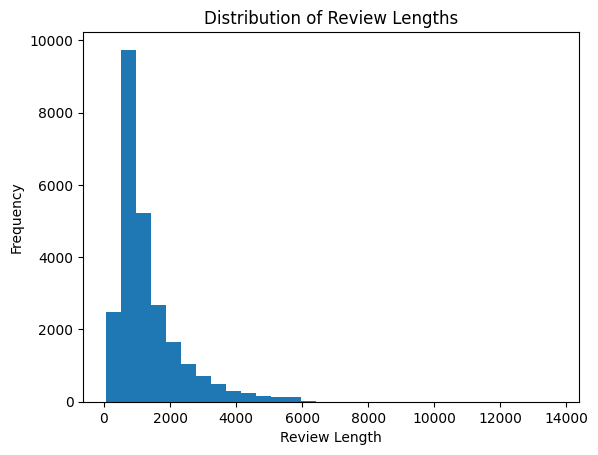

In [165]:
# looks like the data is evenly balanced, so now we want to see how long these reviews are
if not (os.path.isfile("train_review_data.csv")):
    train_data["review_length"] = train_data["review"].apply(len) # creating a new column that stores the length of the data
plt.hist(train_data["review_length"], bins=30)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

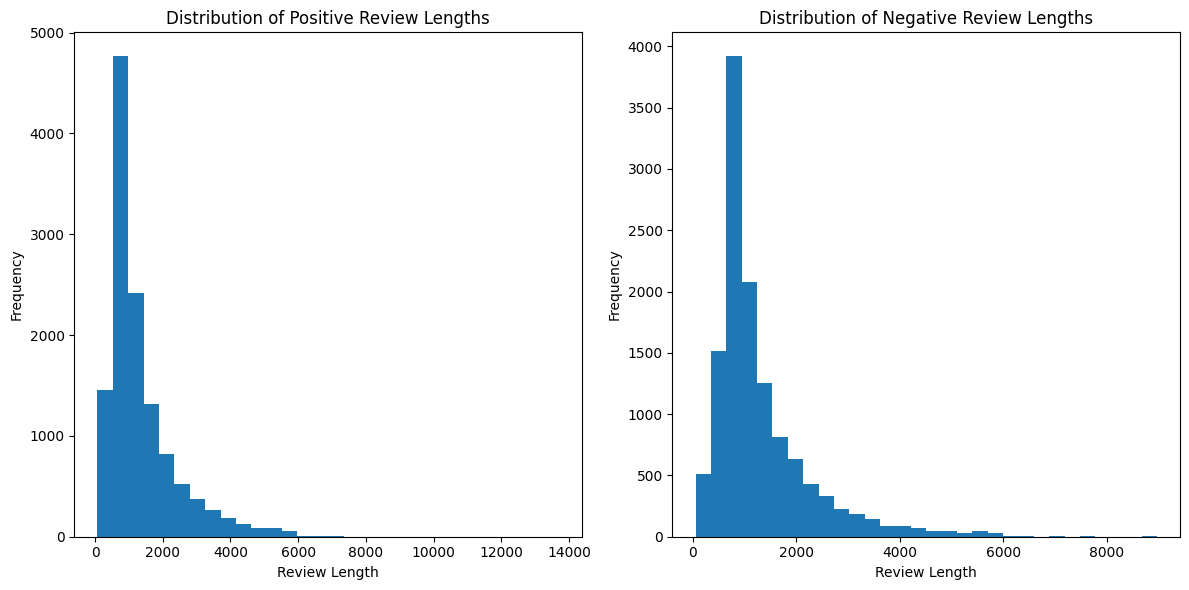

In [166]:
# we can try to see the length of reviews for both the negative and positive reviews as well
pos_reviews = train_data[train_data["label"] == 1]
neg_reviews = train_data[train_data["label"] == 0]

plt.figure(figsize=(12, 6))

# positive reviews
plt.subplot(1, 2, 1) # this graph will be stored in the first row first column
plt.hist(pos_reviews["review_length"], bins=30)
plt.title("Distribution of Positive Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

# negative reviews
plt.subplot(1, 2, 2) # this graph will be stored in the first row second column
plt.hist(neg_reviews["review_length"], bins=30)
plt.title("Distribution of Negative Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [167]:
print(f"Maximum positive review length = {max(pos_reviews["review_length"])}")
print(f"Mainimum positive review length = {min(pos_reviews["review_length"])}")
print(f"Average positive review length  = {np.mean(pos_reviews["review_length"])}")
print(f"Median positive review lengths = {np.median(pos_reviews["review_length"])}")

print(f"Maximum negative review length = {max(neg_reviews["review_length"])}")
print(f"Mainimum negative review length = {min(neg_reviews["review_length"])}")
print(f"Average negative review length  = {np.mean(neg_reviews["review_length"])}")
print(f"Median negative review lengths = {np.median(neg_reviews["review_length"])}")

Maximum positive review length = 13704
Mainimum positive review length = 70
Average positive review length  = 1347.16024
Median positive review lengths = 982.0
Maximum negative review length = 8969
Mainimum negative review length = 52
Average negative review length  = 1302.97904
Median negative review lengths = 976.5


In [168]:
# it looks like the negative reviews have slightly longer reviews compared to the positive reviews, but at a galnce it does not look like much of a difference
# now I want to display the word frequency of the review data by using the word cloud, but first I will clean the text data and save it as a column to the data frame

# we need to run this bit of code for the cleaning to work, but you only need to run it once
nltk.download('punkt_tab', download_dir='C:\\Users\\harto\\nltk_data')
nltk.download('stopwords', download_dir='C:\\Users\\harto\\nltk_data')
nltk.download('wordnet', download_dir='C:\\Users\\harto\\nltk_data')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harto\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harto\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\harto\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [169]:
# helper function clean text function to convert text to lowercase, remove special characters
# (punctuation, numbers, etc.), remove stop words, tokenize, and apply lemmatization
def clean_text(text):
  text = text.lower()

  text = re.sub(r'[^a-zA-Z\s]', '', text)

  tokens = word_tokenize(text)

  stop_words = set(stopwords.words("english"))
  tokens = [word for word in tokens if word not in stop_words]

  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  cleaned_text = ' '.join(tokens)

  return cleaned_text

In [170]:
if not (os.path.isfile("train_review_data.csv")):
    train_data["cleaned_review"] = train_data["review"].apply(clean_text) # create a new column in our data frame that has the cleaned text so we can use it later
# we wont be using this cleaned text in the BERT model since it would perform poorly on pre cleaned data, so we will just use this for analysis and such

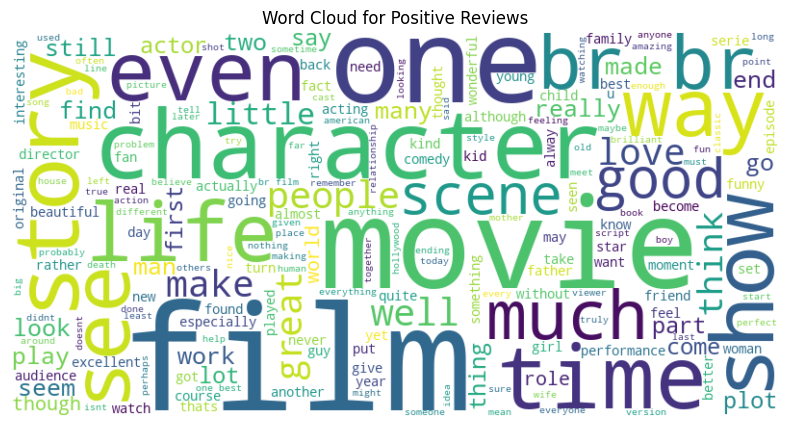

In [171]:
# lets take a look at the word cloud for the positive reviews then the neagtive reviews
pos_text = ' '.join(train_data[train_data["label"] == 1]["cleaned_review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

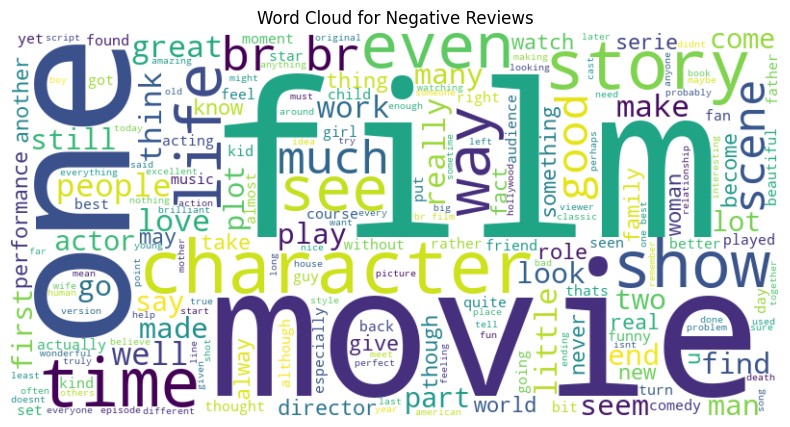

In [172]:
# then the negatvie reviews
neg_text = ' '.join(train_data[train_data["label"] == 0]["cleaned_review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

In [173]:
# take a look at the changes we made to the datafram again here
display(train_data)

,review,label,review_length,cleaned_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,806,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,1,2366,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,841,brilliant overacting lesley ann warren best dr...
3,This is easily the most underrated film inn th...,1,663,easily underrated film inn brook cannon sure f...
4,This is not the typical Mel Brooks film. It wa...,1,647,typical mel brook film much less slapstick mov...
...,...,...,...,...
24995,"Towards the end of the movie, I felt it was to...",0,1567,towards end movie felt technical felt like cla...
24996,This is the kind of movie that my enemies cont...,0,859,kind movie enemy content watch time bloody tru...
24997,I saw 'Descent' last night at the Stockholm Fi...,0,1688,saw descent last night stockholm film festival...
24998,Some films that you pick up for a pound turn o...,0,1277,film pick pound turn rather good rd century fi...


### Processing the word to extract unique words in negative and positive class

In [174]:
#global variable declaration for the data 
data_processed = {}
#function to add word into the dictionary or words counter

def add_word_counter(label, word):
    
    if word not in data_processed:
        data_processed[word] = [0,0,0]
    
    data_processed[word][label] += 1
    data_processed[word][2] += 1

In [175]:
#create a data frame
if (os.path.isfile("processed_train_data.csv")):
    processed_train_data = pd.read_csv("processed_train_data.csv")
else:
    for i in pos_text.split():
        add_word_counter(1, i)

    for i in neg_text.split():
        add_word_counter(0,i)
        
    processed_train_data = pd.DataFrame(columns = ["Token" , "Negative" , "Positive" , "Total"])
    k = 0
    for i in data_processed:
        processed_train_data.loc[k] = [i] + data_processed[i]
        k += 1

display(processed_train_data)

,Token,Negative,Positive,Total
0,bromwell,0,8,8
1,high,941,976,1917
2,cartoon,376,341,717
3,comedy,1564,1877,3441
4,ran,114,121,235
...,...,...,...,...
108978,irreversiblestyle,1,0,1
108979,americancanadian,1,0,1
108980,lasciviousdecadent,1,0,1
108981,chroniclesbr,1,0,1


In [176]:
if (not (os.path.isfile("processed_train_data.csv"))):
    processed_train_data.to_csv("processed_train_data.csv", index = False)

In [177]:
for i in range(10):
    processed_train_data = processed_train_data.drop(index = [processed_train_data["Total"].idxmax()])

In [178]:
display(processed_train_data)

,Token,Negative,Positive,Total
0,bromwell,0,8,8
1,high,941,976,1917
2,cartoon,376,341,717
3,comedy,1564,1877,3441
4,ran,114,121,235
...,...,...,...,...
108978,irreversiblestyle,1,0,1
108979,americancanadian,1,0,1
108980,lasciviousdecadent,1,0,1
108981,chroniclesbr,1,0,1


## TF-IDF and Cosine Similarity Scoring

In [179]:
# We will be using cosine similarity to measure how similar one class to the other
# Create a function to calculate the tf_idf of each token
def calculate_tf_idf():
    processed_train_data["Classes"] = 0

    for index, row in processed_train_data.iterrows():
        if row["Positive"] > 0 and row["Negative"] > 0:
            processed_train_data.at[index, "Classes"] += 2
        else:
            processed_train_data.at[index, "Classes"] += 1

    total_negative = sum(processed_train_data["Negative"])
    total_positive = sum(processed_train_data["Positive"])

    processed_train_data["TFIDF_pos"] = (processed_train_data["Positive"] / total_positive) * (np.log(3 / (processed_train_data["Classes"] + 1) + 1))
    processed_train_data["TFIDF_neg"] = (processed_train_data["Negative"] / total_negative) * (np.log(3 / (processed_train_data["Classes"] + 1) + 1))

calculate_tf_idf()
display(processed_train_data)

,Token,Negative,Positive,Total,Classes,TFIDF_pos,TFIDF_neg
0,bromwell,0,8,8,1,0.000005,0.000000e+00
1,high,941,976,1917,2,0.000473,4.744065e-04
2,cartoon,376,341,717,2,0.000165,1.895609e-04
3,comedy,1564,1877,3441,2,0.000909,7.884928e-04
4,ran,114,121,235,2,0.000059,5.747326e-05
...,...,...,...,...,...,...,...
108978,irreversiblestyle,1,0,1,1,0.000000,6.664519e-07
108979,americancanadian,1,0,1,1,0.000000,6.664519e-07
108980,lasciviousdecadent,1,0,1,1,0.000000,6.664519e-07
108981,chroniclesbr,1,0,1,1,0.000000,6.664519e-07


In [180]:
# Create a function to calculate the cosine simiilarity
def cosine_similarity(negative, positive):

    dot_product = np.dot(negative, positive)

    magnitude_neg = np.linalg.norm(negative)
    magnitude_pos = np.linalg.norm(positive)

    cosine_similarity = dot_product / (magnitude_neg * magnitude_pos)

    return cosine_similarity

print(f'Original data score = {np.round(cosine_similarity(processed_train_data["TFIDF_neg"],processed_train_data["TFIDF_pos"]),2)}')

Original data score = 0.93


### Removal of top 10 common words

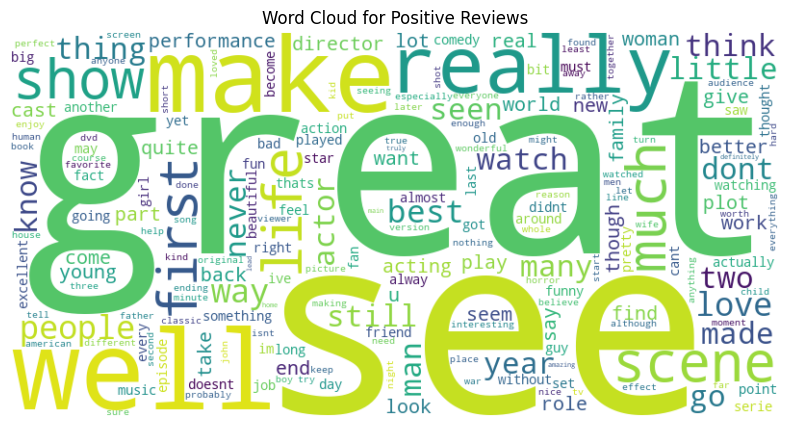

In [181]:
# the word cloud for the positive review after removing top 10 common words
to_compile = []
for i in processed_train_data.itertuples():
    for k in range (i.Positive):
        to_compile.append(str(i.Token))

pos_text = ' '.join(to_compile)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations = False).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

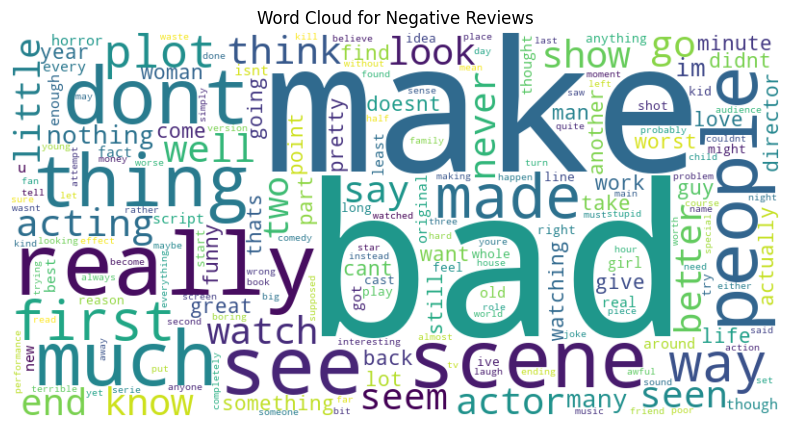

In [182]:
to_compile = []
for i in processed_train_data.itertuples():
    for k in range (i.Negative):
        to_compile.append(str(i.Token))

neg_text = ' '.join(to_compile)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations = False).generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

In [183]:
# Calculating the score
calculate_tf_idf()
print(f'Top 10 common words removal data score = {np.round(cosine_similarity(processed_train_data["TFIDF_neg"],processed_train_data["TFIDF_pos"]),2)}')

Top 10 common words removal data score = 0.93


### Manhattan Distance Method

In [184]:
# Reloading data and resetting processed_train_data
processed_train_data = pd.read_csv("processed_train_data.csv")

In [185]:
# Using Manhattan distance to remove common words in both negative and positive class

# Calculating the similarities between the two datasets using Manhattan Distance

token_to_remove = []
for i in processed_train_data.itertuples():
    similarities = abs(i.Negative - i.Positive) / max(i.Negative, i.Positive)
    if (similarities < 0.6):
        token_to_remove.append(i.Token)

processed_train_data = processed_train_data[~processed_train_data['Token'].isin(token_to_remove)]
        
display(processed_train_data)

,Token,Negative,Positive,Total
0,bromwell,0,8,8
19,scramble,6,2,8
26,pathetic,386,59,445
28,pettiness,0,2,2
57,houselessness,0,1,1
...,...,...,...,...
108978,irreversiblestyle,1,0,1
108979,americancanadian,1,0,1
108980,lasciviousdecadent,1,0,1
108981,chroniclesbr,1,0,1


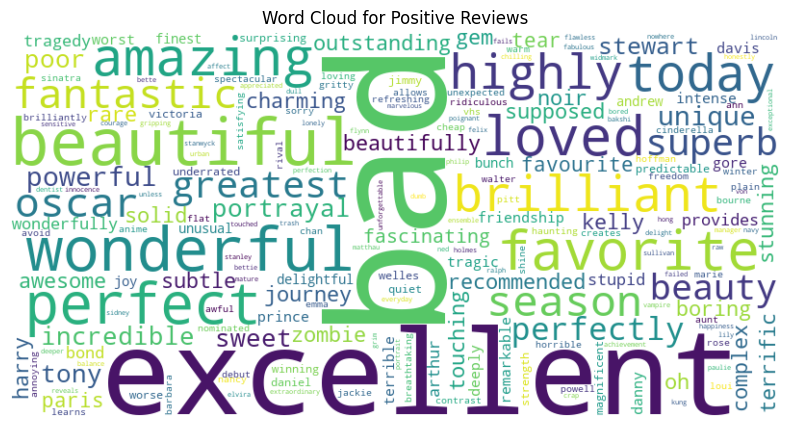

In [186]:
# the word cloud for the positive review after removing common words using Manhattan distance
to_compile = []
for i in processed_train_data.itertuples():
    for k in range (i.Positive):
        to_compile.append(str(i.Token))

pos_text = ' '.join(to_compile)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations = False).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

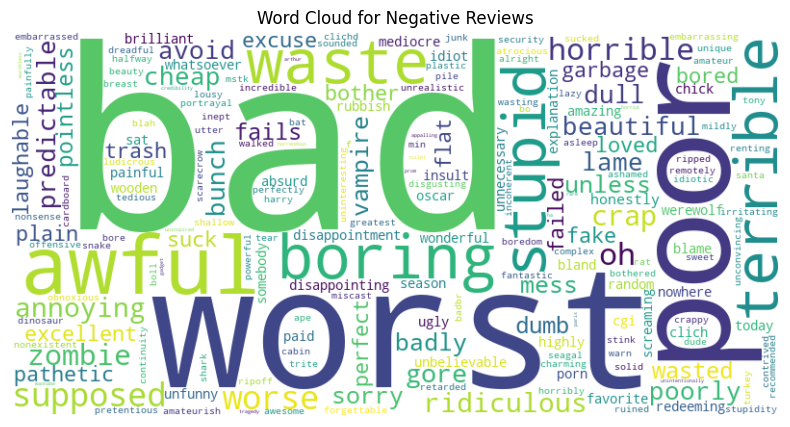

In [187]:
to_compile = []
for i in processed_train_data.itertuples():
    for k in range (i.Negative):
        to_compile.append(str(i.Token))

neg_text = ' '.join(to_compile)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations = False).generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

In [188]:
# Calculating the score
calculate_tf_idf()
print(f'Manhattan distance data score = {np.round(cosine_similarity(processed_train_data["TFIDF_neg"],processed_train_data["TFIDF_pos"]),2)}')

Manhattan distance data score = 0.53


### TF-IDF Cosine Similarity Method

In [189]:
# Reset the processed_train_data again
processed_train_data = pd.read_csv("processed_train_data.csv")

# Calculate the tf-idf 
calculate_tf_idf()
display(processed_train_data)

,Token,Negative,Positive,Total,Classes,TFIDF_pos,TFIDF_neg
0,bromwell,0,8,8,1,0.000005,0.000000e+00
1,high,941,976,1917,2,0.000433,4.313117e-04
2,cartoon,376,341,717,2,0.000151,1.723413e-04
3,comedy,1564,1877,3441,2,0.000834,7.168666e-04
4,ran,114,121,235,2,0.000054,5.225242e-05
...,...,...,...,...,...,...,...
108978,irreversiblestyle,1,0,1,1,0.000000,6.059118e-07
108979,americancanadian,1,0,1,1,0.000000,6.059118e-07
108980,lasciviousdecadent,1,0,1,1,0.000000,6.059118e-07
108981,chroniclesbr,1,0,1,1,0.000000,6.059118e-07


In [190]:
sim_values = []

#sorting values based on the highest frequency
processed_train_data = processed_train_data.sort_values(by = "Total", ascending = False)

display(processed_train_data)

,Token,Negative,Positive,Total,Classes,TFIDF_pos,TFIDF_neg
92,br,29843,27843,57686,2,0.012364,1.367868e-02
269,movie,27801,21799,49600,2,0.009680,1.274272e-02
187,film,21330,23860,45190,2,0.010595,9.776703e-03
45,one,12962,13706,26668,2,0.006086,5.941192e-03
107,like,11143,8962,20105,2,0.003980,5.107445e-03
...,...,...,...,...,...,...,...
108966,mwuhahahaa,1,0,1,1,0.000000,6.059118e-07
108965,splintbr,1,0,1,1,0.000000,6.059118e-07
108964,insulationbr,1,0,1,1,0.000000,6.059118e-07
108963,hoodsbr,1,0,1,1,0.000000,6.059118e-07


In [ ]:
alpha = 1000
max_similarities = cosine_similarity(processed_train_data["TFIDF_neg"] , processed_train_data["TFIDF_pos"])
for i in processed_train_data.itertuples():
    temp_similarities = cosine_similarity(processed_train_data[processed_train_data["Token"] != i.Token]["TFIDF_neg"], processed_train_data[processed_train_data["Token"] != i.Token]["TFIDF_pos"])
    if (temp_similarities < max_similarities):
        max_similarities = temp_similarities
        processed_train_data = processed_train_data[processed_train_data["Token"] != i.Token]
    
    if (len(sim_values) == alpha and np.mean(sim_values[len(sim_values) - alpha : len(sim_values)]) - max_similarities < 0.00001): 
        break
    # if (max_similarities < 0.5):
    #     break
    
    sim_values.append(max_similarities)

plt.plot(sim_values)
plt.title("Cosine Similarity Score Reduction")
plt.ylabel("Cosine Similarity Score")
plt.xlabel("Iterations")
plt.show()

display(processed_train_data)
     

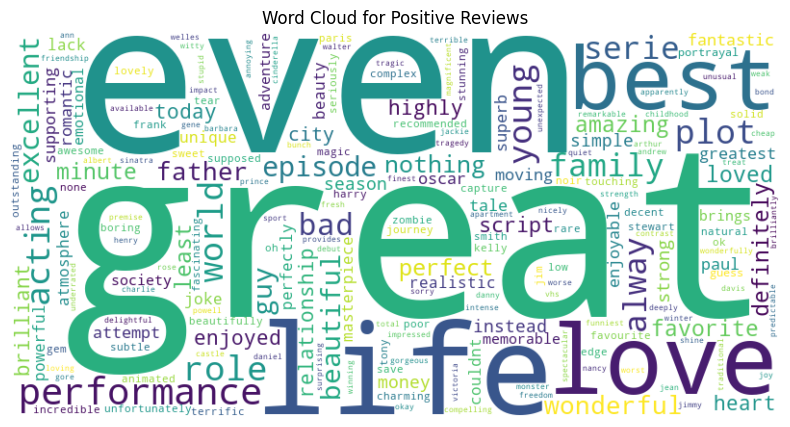

In [ ]:
to_compile = []
for i in processed_train_data.itertuples():
    for k in range (i.Positive):
        to_compile.append(str(i.Token))

pos_text = ' '.join(to_compile)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations = False).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

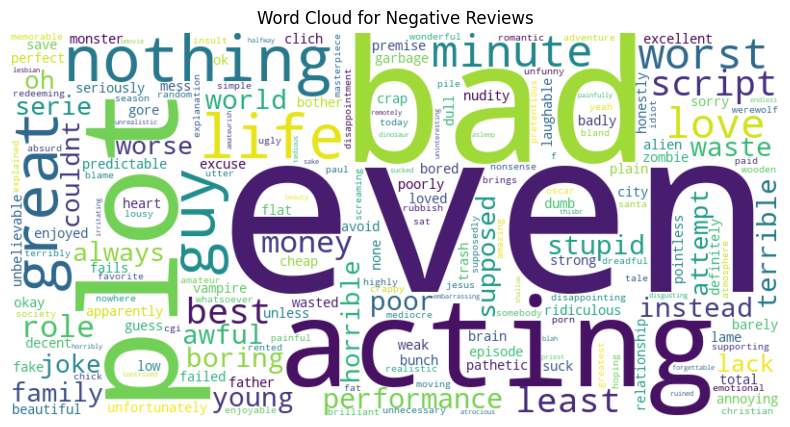

In [ ]:
to_compile = []
for i in processed_train_data.itertuples():
    for k in range (i.Negative):
        to_compile.append(str(i.Token))

neg_text = ' '.join(to_compile)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations = False).generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

In [ ]:
# Calculating the score
calculate_tf_idf()
print(f'Cosine Similarity Reduction data score = {np.round(cosine_similarity(processed_train_data["TFIDF_neg"],processed_train_data["TFIDF_pos"]),2)}')

Cosine Similarity Reduction data score = 0.75


### Data storing

In [ ]:
# save dataframe to a csv file
if (not (os.path.isfile("train_review_data.csv"))):
    train_data.to_csv("train_review_data.csv", index=False)

In [ ]:
# we will also convert the training data to a dataframe in a csv file to be used later
if (os.path.isfile("test_review_data.csv")):
    test_data = pd.read_csv("test_review_data.csv")
else:
    test_pos = load_reviews(os.path.join(base_path, "test/pos"), label=1)
    test_neg = load_reviews(os.path.join(base_path, "test/neg"), label=0)

    test_data = pd.concat([test_pos, test_neg]).reset_index(drop=True)

In [ ]:
print("Number of reviews:", len(test_data))
display(test_data)

Number of reviews: 25000


,review,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
...,...,...
24995,I occasionally let my kids watch this garbage ...,0
24996,When all we have anymore is pretty much realit...,0
24997,The basic genre is a thriller intercut with an...,0
24998,Four things intrigued me as to this film - fir...,0


In [ ]:
test_data.to_csv("test_review_data.csv", index=False)